# Software Coaching for Python
# Week 1: Web Scraping - Exercises

Instructor: Kang-Pyo Lee 

1\. Import the <b>requests</b> package and the <b>BeautifulSoup</b> module from the <b>bs4</b> package . You are going to extract information from one of the webpages on un.org: https://news.un.org/en/story/2021/02/1085812. Save the URL of the webpage in the `url` variable. Fetch the HTML content from the webpage and save it in the `r` variable. Then, create a BeautifulSoup object named `soup` to parse the HTML content in `r`. 

In [1]:
# Your answer here
import requests
from bs4 import BeautifulSoup

url = "https://news.un.org/en/story/2021/02/1085812"
r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")
soup

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<link href="https://news.un.org/en/sites/all/themes/bootstrap_un_news/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="Nations are “nowhere close” to the level of action needed to fight global warming, a UN climate action report said on Friday, urging countries to adopt stronger and more ambitious plans to

2\. Get the title text of the webpage '*UN climate report a ‘red alert’ for the planet: Guterres | | UN News*'. Do not confuse with the title of the article. Note that you must get only the title text, not the title element. 

In [2]:
# Your answer here
soup.title.text

'UN climate report a ‘red alert’ for the planet: Guterres | | UN News'

3\. Get the title text of the article '<i>UN climate report a ‘red alert’ for the planet: Guterres </i>'. 

In [3]:
# Your answer here
soup.find(name='h1', attrs= {'class': 'story-title'}).text


'UN climate report a ‘red alert’ for the planet: Guterres '

4\. Now, you want to find the img element defining the large featured image right below the article title. After identifying the img element using the Inspect feature, you probably want to find it using its class name. Try that now and learn it is not the img element you are looking for. 

In [4]:
# Your answer here
img_url = soup.find('img', attrs = {'class':'img-responsive'})['src']
img_url

#단순히 image-responsive로 하면 다른 img 클래스가 나옴


'/en/sites/all/themes/bootstrap_un_wss/images/logo.svg'


5\. This indicates that there are more than one img elements with the same class name. Now that you are aware of it, you would better find its parent/ancestor element that contains the img element you are searching for. The div element with the class name, '*featured-media*', should be the best for that. Find the div element. 

In [5]:
# Your answer here
parent = soup.find('div', attrs = {'class':'featured-media'})
parent

<div class="featured-media"><!-- scald=685362:un_news_full_width -->
<picture>
<!--[if IE 9]><video style="display: none;"><![endif]-->
<source media="(max-width : 480px)" srcset="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image300x180cropped.jpg"/>
<source media="(max-width : 768px)" srcset="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image770x420cropped.jpg"/>
<!--[if IE 9]></video><![endif]-->
<img class="img-responsive" height="" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg" title="Global temperature rise could lead to more frequent and more inte

6\. Examining the HTML code inside the div element above, you should see there is only one img element in it, which is exactly what you have been looking for. Find the img element. 

In [6]:
# Your answer here
img_url = parent.find('img')['src']
img_url

'https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg'

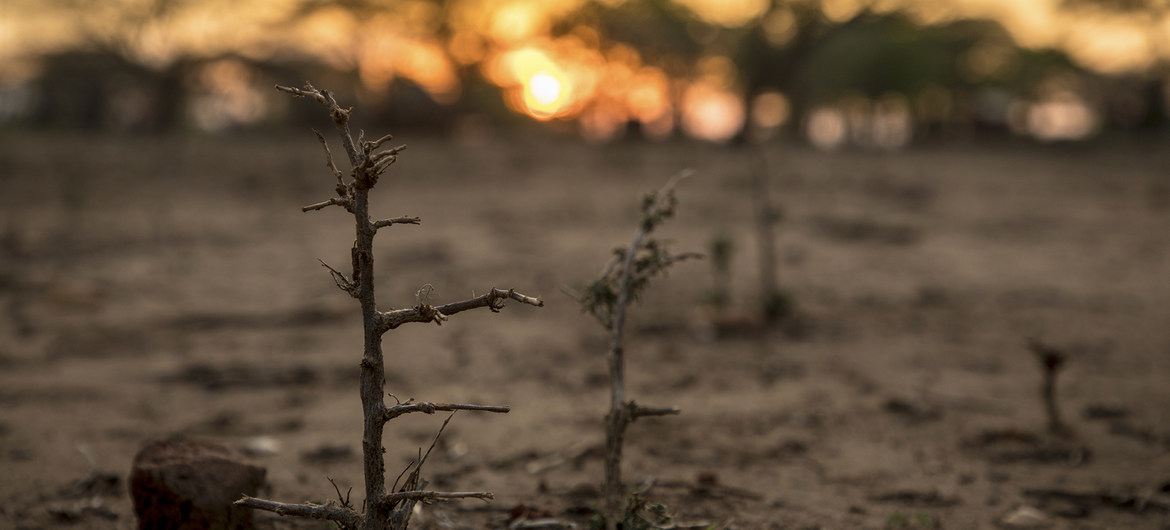

In [7]:
from IPython.display import Image
Image(img_url)

*** Note: you may want to find it by searching for all img elements and then simply taking the third element, which should work at least for this page. This approach, however, is not recommended because, when you want to apply the same code to other pages, there is no guarantee that the target image is always the third image in the page. Finding an element using its attributes is preferred over that using its relative position. 

In [8]:
soup.find_all("img")[2]

<img class="img-responsive" height="" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg" title="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " width="100%">
</img>

7\. Extract the URL of the image and save it in the `img_url` variable. 

In [9]:
# Your answer here
img_url = soup.find_all("img")[2]['src']

In [10]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
print(img_url)

https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg


8\. Using a regular expression, extract, from `img_url`, the image file name that is located after the last slash ('/') in the URL and ends with '*.jpg*'.

In [11]:
# Your answer here
import re

# file_name = img_url.split('/')[-1]
# le_name


file_name = re.findall('/([\w]+\.jpg)$', img_url)[0]
file_name

'image1170x530cropped.jpg'

In [20]:
file_name = img_url.split('/')[-1]
file_name


'image1170x530cropped.jpg'

9\. Fetch the content of the image and save the image in the `outcome` folder using the image file name you got from Q8. 

In [12]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "ESK"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = "{}/{}/outcome".format(path, my_folder)

Mounted at /content/gdrive


In [13]:
# Your answer here
r = requests.get(img_url)

with open("{}/{}".format(outcome_folder, file_name), "w+b") as fw:
    fw.write(r.content) #r.content == 이미지 데이터

10\. Display the image. 

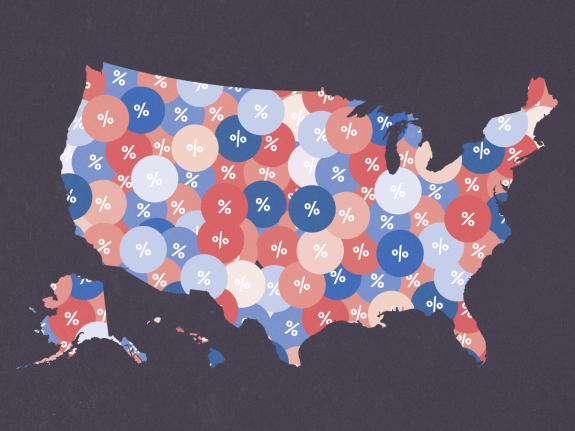

In [14]:
# Your answer here
Image("{}/photo.jpg".format(outcome_folder, file_name))

11\. Get the body text of the article, which starts with '*The UN Framework Convention*' and ends with '*it’s crucial now.”*'. Replace all unnecessary new lines ('\n') in the body text with spaces (' ') and strip out all unnecessary leading and trailing whitespaces.

In [15]:
# Your answer here
soup.find('div', attrs = {'class':'content'}).find('div', attrs = {'class':'content'}).find('div', attrs={'class': 'field-item even'}).text.replace('\n', " ").strip()

'The UN Framework Convention on Climate Change (UNFCCC)’s Initial NDC Synthesis Report measures the progress of national climate action plans, known as Nationally Determined Contributions or NDCs, ahead of the 26th session of Conference of its Parties (COP26) this November in Glasgow.\xa0 It found that even with increased efforts by\xa0some\xa0countries, the combined impact falls far short of what is needed.\xa0 “Today’s interim report from the UNFCCC is a red alert for our planet. It shows governments are nowhere close to the level of ambition needed to limit climate change to 1.5 degrees and meet the goals of the Paris Agreement”, Secretary-General António Guterres said on the report’s findings.\xa0 2021, a ‘make or break’\xa0year\xa0 He said 2021 is a “make or break year” to confront the global climate emergency. \xa0 “The science is clear, to limit global temperature rise to 1.5 degrees Celsius, we must cut global emission by 45 per cent by 2030, from 2010 levels”, he stressed.\xa0

12\. On the right hand side of the webpage, there is a section entitled '*RELATED STORIES*'. Now, you want to extract the three titles in the section. Find the section element with the value of its id being '*block-views-b264f1f0404c604764b6fabf16396e35*'.  

*** Homework: think about why we are trying to find this particular section element among others. 

In [16]:
# Your answer here
sections = soup.find('section', attrs={'id': 'block-views-b264f1f0404c604764b6fabf16396e35'})
sections

<section class="block block-views clearfix" id="block-views-b264f1f0404c604764b6fabf16396e35">
<h2 class="block-title">Related Stories</h2>
<div class="view view-story-related-stories view-id-story_related_stories view-display-id-story_related_stories_block story-related-stories teaser-image-small view-dom-id-05b9ca9ec1c827804f0a6038c35d280d">
<div class="view-content">
<div class="views-row views-row-1 views-row-odd views-row-first">
<div class="story-block clearfix">
<div class="story-photo pull-left"><a href="https://news.un.org/en/story/2021/01/1082072"><!-- scald=677492:un_news_small --><img class="img-responsive" height="" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/13-01-2021_CIFOR_Tanzania.jpg/image100x100cropped.jpg" title="Workers pick tea in Tanzania. Changes in the climate have affected crops such as tea, across the world." width=""/><!-- END scald=677492 --></a></div>
<h1 class="story

13\. Examining the HTML code inside the section element above, you should see each of the three titles are defined in an a element. Get the list of those three a elements.  

In [17]:
# Your answer here
titles = []
titles_class = sections.find_all('h1', attrs={'class', 'story-title'})
for title_class in titles_class:
  titles.append(title_class.text)

14\. Iterating over the list, print the title text, separated by a new line. It looks as follows:

Step up action and adapt to 'new climate reality', UN environment report urges<br>
Nature ‘one of most effective ways’ of combatting climate change<br>
Oslo leads the way in ‘Breathe Life’ campaign for cleaner cities in climate change era

In [18]:
# Your answer here
for title in titles:
  print(title)

Step up action and adapt to 'new climate reality', UN environment report urges
Nature ‘one of most effective ways’ of combatting climate change
Oslo leads the way in ‘Breathe Life’ campaign for cleaner cities in climate change era 
